# Simplified Melbourne House Price Prediction

Constraints:
- Not forecasting into the future.
- Linear Model.
- Max 2 features per model.
- Optimising Mean Square Error.

In [2]:
import os

In [3]:
os.getcwd()
os.chdir('C:\\Users\\zak\\Projects\\PycharmProjects\\data-science\\')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import math

from utils import setup_project_root

In [5]:
setup_project_root()

WindowsPath('C:/Users/zak/Projects/PycharmProjects/data-science')

In [6]:
unaltered_dataframe = pd.read_csv("data/melb_data.csv")

<Axes: >

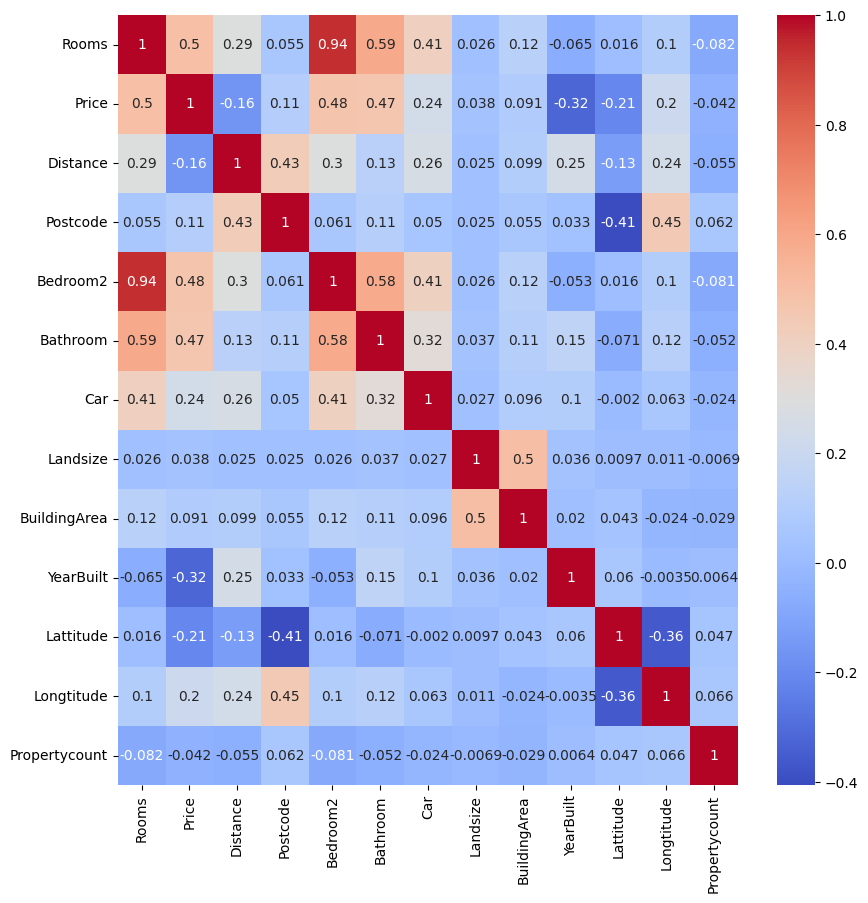

In [7]:
# I have the constraint of picking just two features. Let's pick the ones that have the highest correlation with price.
plt.figure(figsize = (10, 10))
sns.heatmap(unaltered_dataframe.select_dtypes(include=[np.number]).corr(), annot = True, cmap = "coolwarm")

## Step 0: The Super Naive Prediction
Let's start by using the unaltered data and creating a model.

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# Handle missing data by removing it.
naive_df = unaltered_dataframe.dropna()
print(len(naive_df))

X = naive_df[['Rooms', 'Bedroom2']]
y = naive_df["Price"]

6196


In [51]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

In [52]:
linear_model = LinearRegression()

In [53]:
linear_model.fit(train_X, train_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
price_predictions = linear_model.predict(val_X)

In [55]:
mean_absolute_percentage_error(val_y, price_predictions)

0.36378349959207784

In [56]:
mse = mean_squared_error(val_y, price_predictions)
math.sqrt(mse)

567365.7408440483

<Axes: xlabel='Bedroom2', ylabel='Price'>

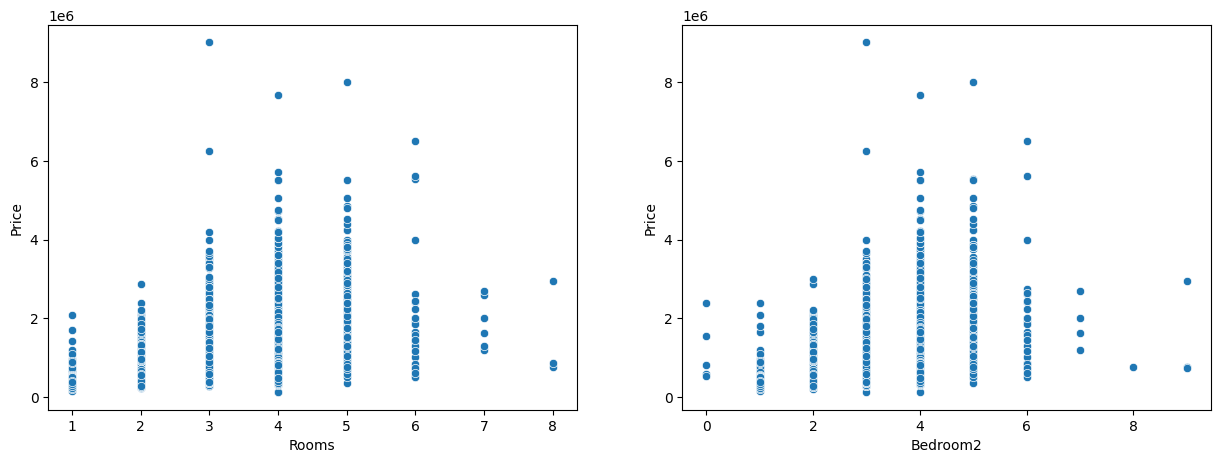

In [57]:
# Let's plot both our variables with price

fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = "Rooms", y = "Price", data = naive_df, ax = axes[0])
sns.scatterplot(naive_df, x = "Bedroom2", y = "Price", ax = axes[1])

These two variables basically look the same. Are they each telling my model something new?

In [58]:
print(linear_model.coef_)
print(linear_model.intercept_)
print(list(zip(linear_model.coef_, X.columns)))

[355427.00115882  -5096.11690722]
10034644.168106012
[(np.float64(355427.00115882076), 'Rooms'), (np.float64(-5096.116907223236), 'YearBuilt')]


<Axes: xlabel='Bedroom2', ylabel='Price'>

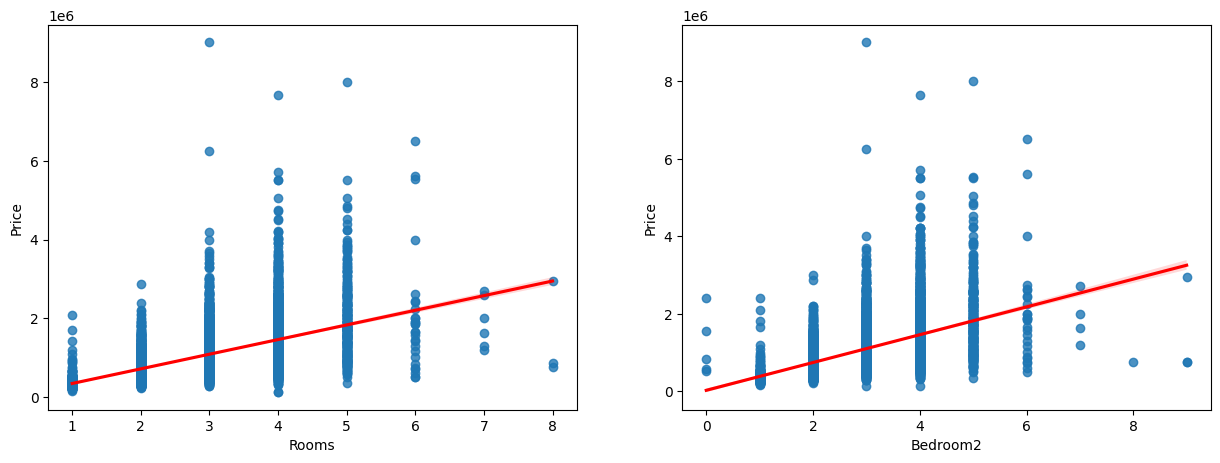

In [59]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(x="Rooms", y="Price", data=naive_df, ax=axes[0], line_kws={'color':'red'})
sns.regplot(x="Bedroom2", y="Price", data=naive_df, ax=axes[1], line_kws={'color':'red'})

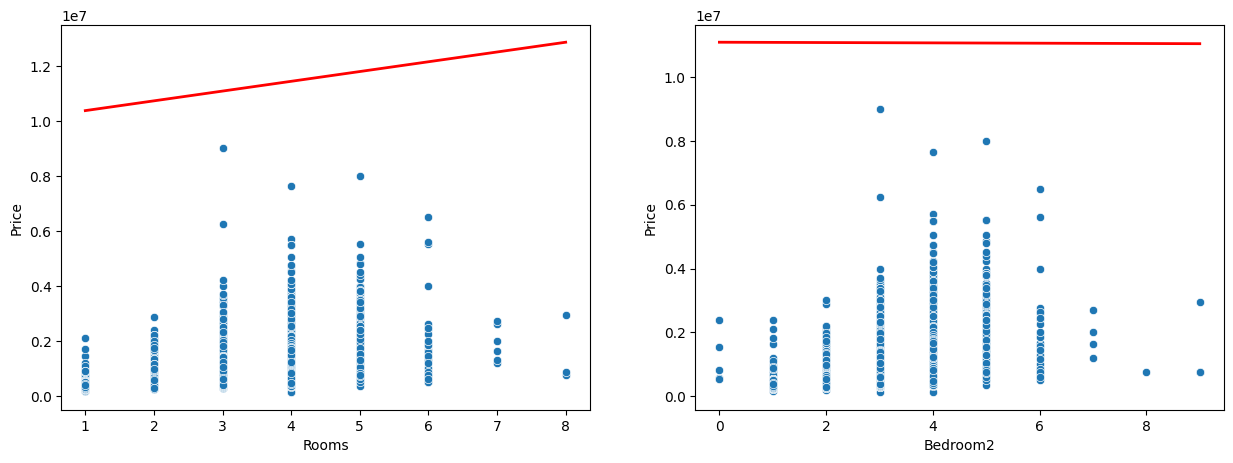

In [60]:
# ... existing code ...
    # Let's plot both our variables with price

fig, axes = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = "Rooms", y = "Price", data = naive_df, ax = axes[0])
sns.scatterplot(x = "Bedroom2", y = "Price", data = naive_df, ax = axes[1])

# To plot a line from a multi-variable model, we have to hold the other variables constant.
# A common practice is to use the mean.
mean_rooms = naive_df['Rooms'].mean()
mean_bedroom2 = naive_df['Bedroom2'].mean()

# The equation is: Price = m1*Rooms + m2*Bedroom2 + c
m1, m2 = linear_model.coef_
c = linear_model.intercept_

# --- Create and plot the line for the 'Rooms' plot ---
# Create a range of values for the x-axis
rooms_x = np.linspace(naive_df['Rooms'].min(), naive_df['Rooms'].max(), 100)
# Calculate the predicted price, holding 'Bedroom2' at its mean
price_y_rooms = m1 * rooms_x + m2 * mean_bedroom2 + c
axes[0].plot(rooms_x, price_y_rooms, color='red', linewidth=2)

# --- Create and plot the line for the 'Bedroom2' plot ---
# Create a range of values for the x-axis
bedroom2_x = np.linspace(naive_df['Bedroom2'].min(), naive_df['Bedroom2'].max(), 100)
# Calculate the predicted price, holding 'Rooms' at its mean
price_y_bedroom2 = m2 * bedroom2_x + m1 * mean_rooms + c
axes[1].plot(bedroom2_x, price_y_bedroom2, color='red', linewidth=2)


<Axes: xlabel='Price', ylabel='Price'>

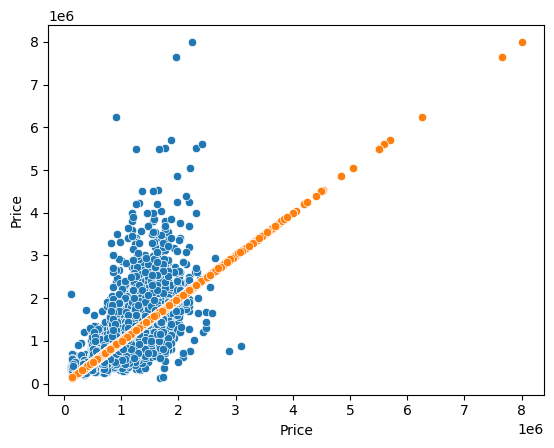

In [61]:
# Visualising the predicted price vs perfect price
pred = linear_model.predict(train_X)
sns.scatterplot(x = pred, y = train_y)
sns.scatterplot(x = train_y, y = train_y)

<Axes: ylabel='Price'>

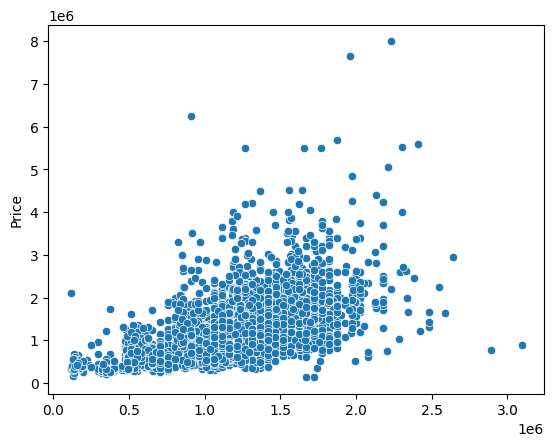

In [62]:
sns.scatterplot(x = pred, y = train_y)

What about two other variables?

In [63]:
# Create a list of the pairs of features and loop through with the results
import itertools

In [64]:
lst = [1, 2, 3, 4]
els = [list(x) for x in itertools.combinations(lst, 2)]
els

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]

In [65]:
unaltered_dataframe.dropna(inplace=True)

numeric_features = unaltered_dataframe.drop("Price", axis=1).select_dtypes(include=[np.number]).dropna()

els = [list(x) for x in itertools.combinations(numeric_features.columns, 2)]
els

[['Rooms', 'Distance'],
 ['Rooms', 'Postcode'],
 ['Rooms', 'Bedroom2'],
 ['Rooms', 'Bathroom'],
 ['Rooms', 'Car'],
 ['Rooms', 'Landsize'],
 ['Rooms', 'BuildingArea'],
 ['Rooms', 'YearBuilt'],
 ['Rooms', 'Lattitude'],
 ['Rooms', 'Longtitude'],
 ['Rooms', 'Propertycount'],
 ['Distance', 'Postcode'],
 ['Distance', 'Bedroom2'],
 ['Distance', 'Bathroom'],
 ['Distance', 'Car'],
 ['Distance', 'Landsize'],
 ['Distance', 'BuildingArea'],
 ['Distance', 'YearBuilt'],
 ['Distance', 'Lattitude'],
 ['Distance', 'Longtitude'],
 ['Distance', 'Propertycount'],
 ['Postcode', 'Bedroom2'],
 ['Postcode', 'Bathroom'],
 ['Postcode', 'Car'],
 ['Postcode', 'Landsize'],
 ['Postcode', 'BuildingArea'],
 ['Postcode', 'YearBuilt'],
 ['Postcode', 'Lattitude'],
 ['Postcode', 'Longtitude'],
 ['Postcode', 'Propertycount'],
 ['Bedroom2', 'Bathroom'],
 ['Bedroom2', 'Car'],
 ['Bedroom2', 'Landsize'],
 ['Bedroom2', 'BuildingArea'],
 ['Bedroom2', 'YearBuilt'],
 ['Bedroom2', 'Lattitude'],
 ['Bedroom2', 'Longtitude'],
 ['Bedr

In [66]:
from sklearn.model_selection import cross_val_score

https://www.kaggle.com/code/alexisbcook/cross-validation

It is a little surprising that we specify negative MAE. Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.

In [26]:
cross_val_score(LinearRegression(), numeric_features[['Rooms', 'Distance']], unaltered_dataframe["Price"], cv=5, scoring='neg_mean_absolute_error').mean()


np.float64(-360923.7310224766)

In [27]:
variable_pair_scores = {x: cross_val_score(LinearRegression(), numeric_features[list(x)], unaltered_dataframe["Price"], cv=5, scoring='neg_mean_absolute_error').mean() for x in itertools.combinations(numeric_features.columns, 2)}
variable_pair_scores

{('Rooms', 'Distance'): np.float64(-360923.7310224766),
 ('Rooms', 'Postcode'): np.float64(-397926.5257622093),
 ('Rooms', 'Bedroom2'): np.float64(-395105.5629258323),
 ('Rooms', 'Bathroom'): np.float64(-383059.5471982161),
 ('Rooms', 'Car'): np.float64(-395708.0217999035),
 ('Rooms', 'Landsize'): np.float64(-395405.06200961577),
 ('Rooms', 'BuildingArea'): np.float64(-368160.51857669244),
 ('Rooms', 'YearBuilt'): np.float64(-361887.03334123426),
 ('Rooms', 'Lattitude'): np.float64(-375187.7536461867),
 ('Rooms', 'Longtitude'): np.float64(-385859.5093480664),
 ('Rooms', 'Propertycount'): np.float64(-396013.74516702385),
 ('Distance', 'Postcode'): np.float64(-461473.11880800483),
 ('Distance', 'Bedroom2'): np.float64(-367294.3199996156),
 ('Distance', 'Bathroom'): np.float64(-401906.87819372077),
 ('Distance', 'Car'): np.float64(-454171.3890997691),
 ('Distance', 'Landsize'): np.float64(-473952.10210581945),
 ('Distance', 'BuildingArea'): np.float64(-357698.4474009221),
 ('Distance', 'Y

In [28]:
pd.DataFrame(list(variable_pair_scores.items()), columns=["Variable Pair", "Score"])

,Variable Pair,Score
0,"(Rooms, Distance)",-360923.731022
1,"(Rooms, Postcode)",-397926.525762
2,"(Rooms, Bedroom2)",-395105.562926
3,"(Rooms, Bathroom)",-383059.547198
4,"(Rooms, Car)",-395708.021800
...,...,...
61,"(YearBuilt, Longtitude)",-435365.509536
62,"(YearBuilt, Propertycount)",-447830.064127
63,"(Lattitude, Longtitude)",-462004.820568
64,"(Lattitude, Propertycount)",-467393.423732


In [29]:
variable_trip_scores = {x: cross_val_score(LinearRegression(), numeric_features[list(x)], unaltered_dataframe["Price"], cv=5, scoring='neg_mean_absolute_error').mean() for x in itertools.combinations(numeric_features.columns, 3)}
variable_trip_scores

{('Rooms', 'Distance', 'Postcode'): np.float64(-337230.21028391103),
 ('Rooms', 'Distance', 'Bedroom2'): np.float64(-361189.4359670843),
 ('Rooms', 'Distance', 'Bathroom'): np.float64(-351644.8071908172),
 ('Rooms', 'Distance', 'Car'): np.float64(-360447.44750572136),
 ('Rooms', 'Distance', 'Landsize'): np.float64(-361353.4592776532),
 ('Rooms', 'Distance', 'BuildingArea'): np.float64(-334589.6443435887),
 ('Rooms', 'Distance', 'YearBuilt'): np.float64(-341707.2844328799),
 ('Rooms', 'Distance', 'Lattitude'): np.float64(-336651.4561399787),
 ('Rooms', 'Distance', 'Longtitude'): np.float64(-338442.01786724525),
 ('Rooms', 'Distance', 'Propertycount'): np.float64(-362712.04801421857),
 ('Rooms', 'Postcode', 'Bedroom2'): np.float64(-398350.593929944),
 ('Rooms', 'Postcode', 'Bathroom'): np.float64(-387374.4928543396),
 ('Rooms', 'Postcode', 'Car'): np.float64(-399192.5911868892),
 ('Rooms', 'Postcode', 'Landsize'): np.float64(-398621.21750095545),
 ('Rooms', 'Postcode', 'BuildingArea'): n

In [30]:
pd.DataFrame(list(variable_trip_scores.items()), columns=["Variable Trip", "Score"])

,Variable Trip,Score
0,"(Rooms, Distance, Postcode)",-337230.210284
1,"(Rooms, Distance, Bedroom2)",-361189.435967
2,"(Rooms, Distance, Bathroom)",-351644.807191
3,"(Rooms, Distance, Car)",-360447.447506
4,"(Rooms, Distance, Landsize)",-361353.459278
...,...,...
215,"(BuildingArea, Longtitude, Propertycount)",-378285.723040
216,"(YearBuilt, Lattitude, Longtitude)",-426458.952854
217,"(YearBuilt, Lattitude, Propertycount)",-431734.534158
218,"(YearBuilt, Longtitude, Propertycount)",-436650.237417


In [31]:
def feature_combinations(n_features):
    variable_trip_scores = {x: cross_val_score(LinearRegression(), numeric_features[list(x)], unaltered_dataframe["Price"], cv=5, scoring='neg_mean_absolute_error').mean() for x in itertools.combinations(numeric_features.columns, n_features)}

    return pd.DataFrame(list(variable_trip_scores.items()), columns=[f"Variables", "Score"])

In [32]:
feature_combinations(4)

,Variables,Score
0,"(Rooms, Distance, Postcode, Bedroom2)",-336984.620705
1,"(Rooms, Distance, Postcode, Bathroom)",-331361.445124
2,"(Rooms, Distance, Postcode, Car)",-336196.706395
3,"(Rooms, Distance, Postcode, Landsize)",-337856.110732
4,"(Rooms, Distance, Postcode, BuildingArea)",-312271.656143
...,...,...
490,"(BuildingArea, YearBuilt, Lattitude, Longtitude)",-314983.159678
491,"(BuildingArea, YearBuilt, Lattitude, Propertyc...",-318295.888184
492,"(BuildingArea, YearBuilt, Longtitude, Property...",-326176.705440
493,"(BuildingArea, Lattitude, Longtitude, Property...",-367378.421434


In [33]:
feature_combinations(5)

,Variables,Score
0,"(Rooms, Distance, Postcode, Bedroom2, Bathroom)",-331052.121148
1,"(Rooms, Distance, Postcode, Bedroom2, Car)",-335833.906494
2,"(Rooms, Distance, Postcode, Bedroom2, Landsize)",-337601.634080
3,"(Rooms, Distance, Postcode, Bedroom2, Building...",-312323.574531
4,"(Rooms, Distance, Postcode, Bedroom2, YearBuilt)",-322336.070379
...,...,...
787,"(Landsize, BuildingArea, YearBuilt, Lattitude,...",-319688.190658
788,"(Landsize, BuildingArea, YearBuilt, Longtitude...",-327166.109743
789,"(Landsize, BuildingArea, Lattitude, Longtitude...",-368568.507673
790,"(Landsize, YearBuilt, Lattitude, Longtitude, P...",-427466.302905


In [34]:
feature_combinations(6)

,Variables,Score
0,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-330641.394535
1,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-331542.374386
2,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-313114.627803
3,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-305198.997307
4,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-323137.626148
...,...,...
919,"(Car, Landsize, BuildingArea, YearBuilt, Longt...",-328267.606649
920,"(Car, Landsize, BuildingArea, Lattitude, Longt...",-371410.305976
921,"(Car, Landsize, YearBuilt, Lattitude, Longtitu...",-405000.274440
922,"(Car, BuildingArea, YearBuilt, Lattitude, Long...",-317841.833979


In [35]:
feature_combinations(7)

,Variables,Score
0,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-331140.713281
1,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-313087.786330
2,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-302711.246308
3,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-322222.414082
4,"(Rooms, Distance, Postcode, Bedroom2, Bathroom...",-323461.855699
...,...,...
787,"(Bathroom, Car, Landsize, BuildingArea, Lattit...",-366695.179262
788,"(Bathroom, Car, Landsize, YearBuilt, Lattitude...",-335675.072905
789,"(Bathroom, Car, BuildingArea, YearBuilt, Latti...",-304372.396895
790,"(Bathroom, Landsize, BuildingArea, YearBuilt, ...",-305247.295160


In [36]:
len(numeric_features.columns)

12

In [37]:
frames = []
for i in range(12):
    frames.append(feature_combinations(i + 1))

all_combos = pd.concat(frames)
all_combos

,Variables,Score
0,"(Rooms,)",-394685.371102
1,"(Distance,)",-475763.745733
2,"(Postcode,)",-486184.651052
3,"(Bedroom2,)",-400823.703236
4,"(Bathroom,)",-418767.200292
...,...,...
8,"(Rooms, Distance, Postcode, Bathroom, Car, Lan...",-275698.324776
9,"(Rooms, Distance, Bedroom2, Bathroom, Car, Lan...",-277186.681289
10,"(Rooms, Postcode, Bedroom2, Bathroom, Car, Lan...",-305100.711223
11,"(Distance, Postcode, Bedroom2, Bathroom, Car, ...",-276254.728277


In [38]:
# Cross-validate each pair to truly know which pair is best
# Assign Cross validation score for each pair. What about more features?
# GridSearchCV

In [39]:
X = naive_df[['Rooms', 'YearBuilt']]
y = naive_df["Price"]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
linear_model = LinearRegression()
linear_model.fit(train_X, train_y)
price_predictions = linear_model.predict(val_X)
mse = mean_squared_error(val_y, price_predictions)
math.sqrt(mse)

567365.7408440483

The next step is maybe cross-validate?

In [40]:
council_price_df = unaltered_dataframe.copy(deep=True)[['CouncilArea', 'Price']]

In [41]:
council_price_df.CouncilArea.value_counts()
# Moreland, Boroondara are my biggest council areas; is there a significant difference between these areas?

CouncilArea
Moreland             658
Boroondara           576
Moonee Valley        504
Darebin              433
Glen Eira            426
Maribyrnong          401
Yarra                339
Port Phillip         336
Stonnington          335
Banyule              279
Melbourne            241
Bayside              223
Hobsons Bay          220
Brimbank             193
Monash               175
Manningham           150
Whitehorse           139
Kingston             111
Hume                  97
Whittlesea            89
Wyndham               47
Knox                  42
Melton                42
Maroondah             35
Frankston             30
Greater Dandenong     21
Nillumbik             18
Casey                 16
Yarra Ranges          10
Macedon Ranges         5
Cardinia               5
Name: count, dtype: int64

In [42]:
stats.ttest_ind(council_price_df.loc[council_price_df.CouncilArea == "Boroondara", "Price"], council_price_df.loc[council_price_df.CouncilArea == "Moreland", "Price"])

TtestResult(statistic=np.float64(22.68822316612944), pvalue=np.float64(1.668164486318791e-95), df=np.float64(1232.0))

In [43]:
council_price_df.loc[council_price_df.CouncilArea == "Moreland", "Price"].mean()

np.float64(817167.8920972644)

In [44]:
council_price_df.loc[council_price_df.CouncilArea == "Boroondara", "Price"].mean()

np.float64(1743577.670138889)

In [67]:
unaltered_dataframe

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [82]:
list(all_combos.loc[all_combos['Score'] == all_combos['Score'].max(), 'Variables'])

[('Rooms',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'BuildingArea',
  'YearBuilt',
  'Lattitude',
  'Longtitude')]

In [80]:
all_combos.iloc[all_combos[['Score']].idxmax()]

,Variables,Score
10,"(Longtitude,)",-472391.19383


The user wants to extract the specific combination of variables that resulted in the highest (closest to zero, since it's negative MAE) score from the `all_combos` DataFrame.



<llm-snippet-file>05_simplified_prediction.ipynb</llm-snippet-file>


In [ ]:
# ... existing code ...
all_combos.iloc[all_combos[['Score']].idxmax()]

In [81]:
list(all_combos.loc[all_combos['Score'] == all_combos['Score'].max(), 'Variables'])


[('Rooms',
  'Distance',
  'Postcode',
  'Bedroom2',
  'Bathroom',
  'Car',
  'BuildingArea',
  'YearBuilt',
  'Lattitude',
  'Longtitude')]